In [1]:
# 必要なライブラリを読み込む
from google.colab import drive 

# Google ドライブをマウントする
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 必要なライブラリを読み込む

# データフレームが扱えるよう、pandas をインポート
import pandas as pd

# グラフ描写のライブラリ
import matplotlib.pyplot as plt
import seaborn as sns

# numpy のデータが扱えるよう、numpy をインポート
import numpy as np

In [19]:
transaction = pd.read_csv("drive/My Drive/Learn Datascience/DATA/Transaction.csv")
transaction.head()

,Transact-ID,UserID,MainItem,Price
0,T00000001,U002136,FASHION-L,14420
1,T00000002,U001926,GOODS-L,19490
2,T00000003,U008955,FASHION-L,1900
3,T00000004,U009751,GOODS-L,1000
4,T00000005,U000533,FASHION-L,3190


In [16]:
unpaid = pd.read_csv("drive/My Drive/Learn Datascience/DATA/Unpaid.csv")
unpaid["Unpaid"] = 1
unpaid.head()

,Transact-ID,Unpaid
0,T00000223,1
1,T00000281,1
2,T00000475,1
3,T00000952,1
4,T00001506,1


In [17]:
user = pd.read_csv("drive/My Drive/Learn Datascience/DATA/User.csv")
user.head()

,UserID,Tel,Address
0,U000001,080-xxxx-xxxx,5
1,U000002,080-xxxx-xxxx,32
2,U000003,080-xxxx-xxxx,21
3,U000004,080-xxxx-xxxx,25
4,U000005,090-xxxx-xxxx,36


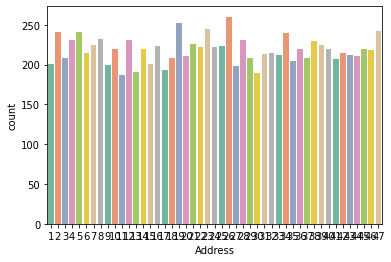

In [21]:
# 棒グラフ（件数集計）を描画
sns.countplot( x=user['Address'] , palette='Set2' )

In [20]:
transaction = pd.merge(transaction , user, left_on = "UserID" , right_on = "UserID"  , how = "left" )
transaction = pd.merge(transaction , unpaid, left_on = "Transact-ID" , right_on = "Transact-ID" , how = "left" )
transaction["Unpaid"] = transaction["Unpaid"].fillna(0).astype('Int64')
transaction.head()

,Transact-ID,UserID,MainItem,Price,Tel,Address,Unpaid
0,T00000001,U002136,FASHION-L,14420,080-xxxx-xxxx,6,0
1,T00000002,U001926,GOODS-L,19490,080-xxxx-xxxx,24,0
2,T00000003,U008955,FASHION-L,1900,080-xxxx-xxxx,26,0
3,T00000004,U009751,GOODS-L,1000,090-xxxx-xxxx,6,0
4,T00000005,U000533,FASHION-L,3190,080-xxxx-xxxx,26,0


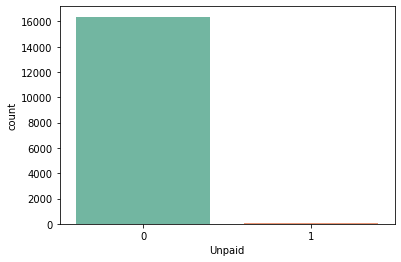

In [22]:
# 棒グラフ（件数集計）を描画
sns.countplot( x=transaction['Unpaid'] , palette='Set2' )

In [25]:
user_unpaid = pd.DataFrame(transaction.groupby(['UserID', 'Unpaid']).count()).reset_index()
user_unpaid.head()

,UserID,Unpaid,Transact-ID,MainItem,Price,Tel,Address
0,U000001,0,2,2,2,2,2
1,U000002,0,2,2,2,2,2
2,U000003,0,2,2,2,2,2
3,U000004,0,1,1,1,1,1
4,U000006,0,3,3,3,3,3
